# 4. Determining the Optimal Number of Clusters

In this notebook, we will determine the optimal number of clusters for our dataset using the Elbow method. The Elbow method is based on the minimization of the sum of squared distances within clusters and examines the percentage of variance explained as a function of the number of clusters. We will stop adding clusters when the addition of a cluster does not significantly increase the variance explained.

---

## Elbow Method

The Elbow method involves the following steps:
1. Compute the clustering algorithm (e.g., K-Means) for different values of k (number of clusters).
2. For each k, calculate the sum of squared distances from each point to its assigned center (inertia).
3. Plot the inertia values against the number of clusters.
4. Identify the 'elbow' point where the inertia begins to decrease more slowly.

---

### Example: Using the Elbow Method to Determine the Optimal Number of Clusters

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

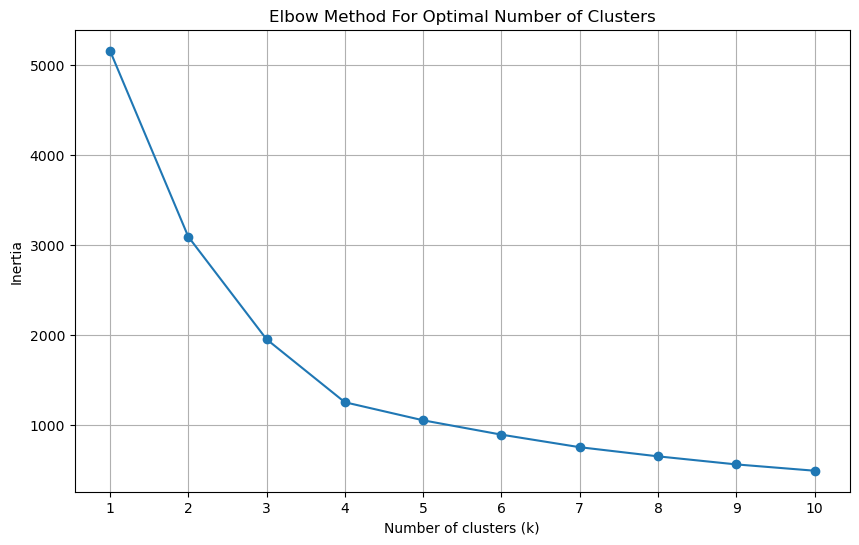

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate sample data
np.random.seed(0)
X = np.random.rand(300, 2) * 10  # Generate 300 data points with 2 features

# List to hold the inertia values for different number of clusters
inertia = []

# Range of clusters to try
cluster_range = range(1, 11)

# Compute K-Means clustering for different values of k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### Explanation

In the plot, the x-axis represents the number of clusters, and the y-axis represents the inertia (sum of squared distances to the nearest cluster center). The 'elbow' point on the graph is where the inertia starts to decrease more slowly, indicating the optimal number of clusters. This point represents a balance between minimizing the inertia and not adding unnecessary complexity to the model.

## Silhouette Method
The Silhouette method involves the following steps:

1. Compute the clustering algorithm (e.g., K-Means) for different values of k (number of clusters).
2. For each k, calculate the average silhouette score, which measures how similar each point is to its own cluster compared to other clusters.
3. Plot the silhouette scores against the number of clusters.
4. Identify the k value with the highest silhouette score.

The silhouette score ranges from -1 to 1, where a high value indicates that the point is well matched to its own cluster and poorly matched to neighboring clusters.

### Example: Using the Silhouette Method

C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ryann\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

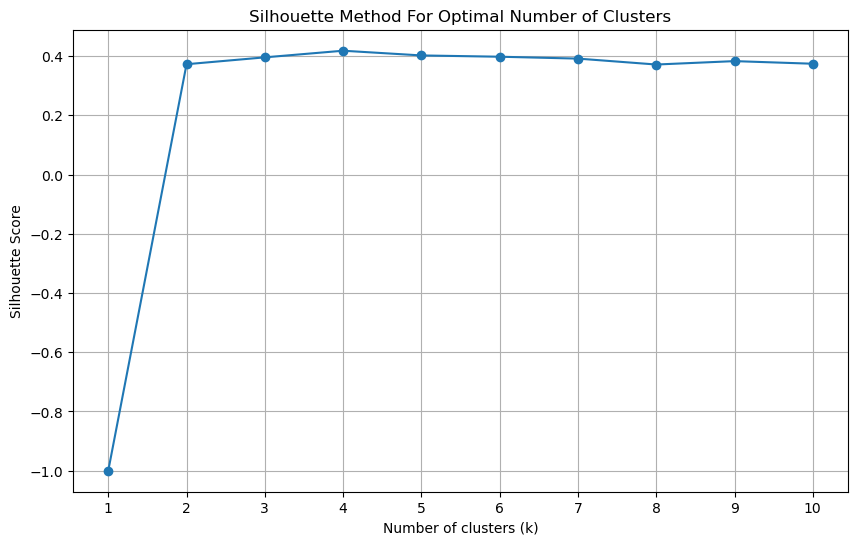

In [6]:
from sklearn.metrics import silhouette_score

# List to hold the silhouette scores for different number of clusters
silhouette_scores = []

# Compute K-Means clustering and silhouette scores for different values of k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    if k == 1:
        silhouette_scores.append(-1)
    else:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

## Gap Statistic
The Gap Statistic method involves the following steps:

1. Compute the clustering algorithm (e.g., K-Means) for different values of k (number of clusters).
2. For each k, calculate the gap statistic, which compares the total within intra-cluster variation for different k values with their expected values under null reference distribution of the data.
3. Plot the gap statistics against the number of clusters.
4. Identify the k value with the largest gap statistic.

The Gap Statistic method attempts to quantify the difference between the observed clustering and an expected random clustering.